<img src="../imgs/bannerSP.png" style="width:1700px;">

# Search-based planning algorithms


***Como un agente puede encontrar una secuencia de acciones para lograr sus metas***

An agent is anything that can be viewed as perceiving its environment through sensors and
SENSOR acting upon that environment through actuators.

## <span style="color:red"> Outline </span> 
1. **Searching Problems**
2. **First solution: Breath First Search (BFS)**
3. **Second solution: Depth First Search (DFS)**


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## <span style="color:red"> 1. Searching Problems </span> 


### 1.1. Route finding problem examples
airline travel-planning systems, route streams in a computer netwoork, car driving, robot navigation. 

- **States** are locations
- **Initial state** is specified by user's query
- **Actions** advance from current location
- **Goal test** is the final destination
- **Path cost** depends monetary cost, waiting time, distance of path, and so on

### 1.2 Well-defined problems and solutions

- **Initial state** where the agent start

- Description of possible **actions**. Given a particular state $s$, which particular action $a$ can the agent do. 

- Description of what each action does, this is named **transition model**
    -Result(S, a)-> return a state
- States, actions, and transition model define the **state space** as a graph: nodes are states and links actions. 
- A **path** is a sequence of states connected by actions. 
- The **goal test** determine the final state the will be achieved. 
- A **path cost** function that assigns a numeric cost to each path

#### Especific example: Robot navigation problem

Solving this problem is important because autonomous robots require the ability to plan its path to reach a goal.
<img src='../imgs/robot_comic1.png' style="width:350px;">

### 1.3 Noninformed algorithms

In this lesson we will to study two noninformed different algorithms: **Breath First Search** and **Depth First Search**

***We assume that robot doest not have any artifitial vision sensor. The robot only is able to move in local directions, one position at time, and detect if position is goal or not***

- To start with robot navigation example, we need to create a map and define motions of robot, it is defined as follows: 

In [68]:
EMPTY, WALL, TARGET, USED = ".","X","T","o"
c  = pd.Series({"EMPTY": ".", "WALL":"X", "TARGET":"T", "USED":"o"})
ci = pd.Series({".": 0, "X": 255, "T":100, "o":200})

def plot_map(grid,path=[]):
    img = np.r_[[[ci[i] for i in j] for j in grid]]
    #print img
    plt.imshow(img, alpha=.5)
    if(len(path)>0):
        for i in range(len(path)-1):
            plt.plot([path[i][1],path[i+1][1]],[path[i][0],path[i+1][0]], color="black", lw=4)    
        plt.title("path length = %d"%len(path))
        
    plt.xticks(range(img.shape[1]), range(img.shape[1]))
    plt.yticks(range(img.shape[0]), range(img.shape[0]))

In [69]:
def possible_moves(grid, y,x):
    moves = [ [y,x+1], [y-1,x], [y,x-1], [y+1,x]]
    
    moves = [(my,mx) for my,mx in moves if mx>=0 and mx<len(grid[0]) and \
                                           my>=0 and my<len(grid) and grid[my][mx]!=c.WALL]    
    return moves

Lets try with an example of grid...

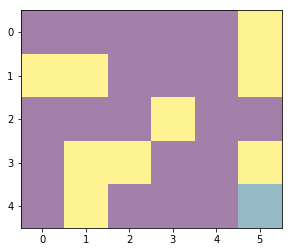

In [70]:
grid = [".....X",
        "XX...X",
        "...X..",
        ".XX..X",
        ".X...T"]

plot_map(grid)

## <span style="color:orange">student</span>: 
- Try with other map configuration!
- Try to pass some manual path

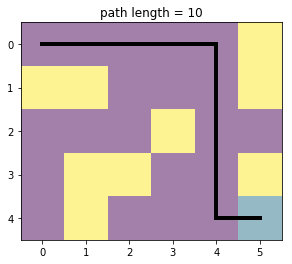

In [74]:
plot_map(grid, [(0,0), (0,1), (0,2),(0,3), (0,4), (1,4), (2,4), (3,4), (4,4), (4,5)])

## <span style="color:red"> 2. First solution: Breath First Search (BFS) </span> 


This is **breadth first**. We put the initial node into the queue. Then repeat this procedure until visit the goal node or visit all available nodes: take the first from the queue, check if it was visited or not, check if it's the goal, put all neighbours in the end of the queue, repeat. For each step we track not only the nodes, but directions and the path for the current node too.

<img src='../imgs/robot_1.png' style="width:500px;">
<img src='../imgs/BFS_tree.png' style="width:700px;">


In [75]:
from collections import deque

def bfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.popleft()
        if grid[y][x] == c.TARGET:
            if verbose:
                print "n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len)
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))

    return []

n_iterations 39, max_queue_len 8
success True


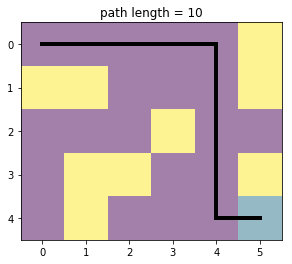

In [76]:
p=bfs_search(grid)
print "success", len(p)>0
plot_map(grid, p)

In [77]:
print p

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5)]


## <span style="color:orange">student</span>: 
- does it give the best answer?

## <span style="color:red"> 3. Second solution: Depth First Search (DFS) </span> 


This is **depth first**. We simply use the other way around.

- Does it give the best answer?
- How is its computational complexity as compared with  BFS?


<img src='../imgs/robot_bfs.png' style="width:700px;">
<img src='../imgs/DFS_tree.png' style="width:700px;">

In [78]:
from collections import deque

def dfs_search(grid, verbose=True):
    n_iterations   = 0
    max_queue_len  = 0
    start = (0, 0)
    queue = deque([([], start)])
    visited = set()
    while queue:
        n_iterations += 1
        max_queue_len = max_queue_len if len(queue) < max_queue_len else len(queue)
        path, (y,x) = queue.pop()
        if grid[y][x] == c.TARGET:
            if verbose:
                print "n_iterations %d, max_queue_len %d"%(n_iterations, max_queue_len)
            return path+[(y,x)]
        if (y,x) in visited:
            continue
        visited.add((y,x))
        for move in possible_moves(grid,y,x):
            queue.append((path + [(y,x)], move))
    return []

n_iterations 35, max_queue_len 15
success True


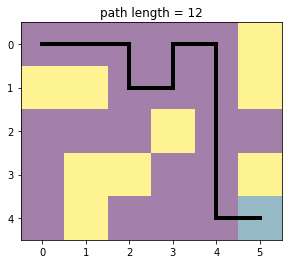

In [79]:
p=dfs_search(grid)
print "success", len(p)>0
plot_map(grid, p)

Genrating more complex grids, by using random maps

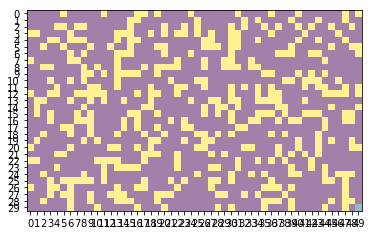

In [81]:
def generate_maze(size):
    grid = (np.random.random(size=size)>.7)*1
    grid = [[c.WALL if grid[x,y] else c.EMPTY for y in range(grid.shape[1])] for x in range(grid.shape[0])]
    grid[-1][-1]=c.TARGET
    return grid
grid = generate_maze(size=(30,50))
plot_map(grid)

[(1, 0), (2, 1)]


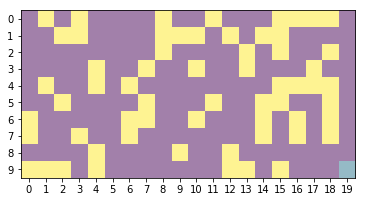

In [82]:
grid = generate_maze(size=(10,20))
plot_map(grid)
print possible_moves(grid, 1,1)

n_iterations 311, max_queue_len 27
success True
100 loops, best of 3: 8.55 ms per loop


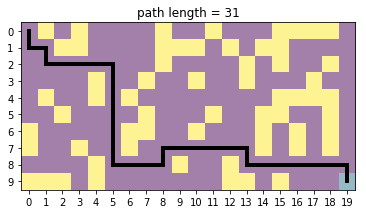

In [83]:
p_bfs = bfs_search(grid)
print "success", len(p_bfs)>0
%timeit bfs_search(grid, verbose=False)
plot_map(grid, p_bfs)

n_iterations 156, max_queue_len 79
success True
100 loops, best of 3: 5.36 ms per loop


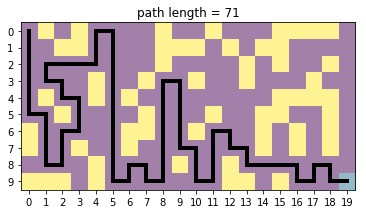

In [84]:
p_dfs = dfs_search(grid)
print "success", len(p_dfs)>0
%timeit dfs_search(grid, verbose=False)
plot_map(grid, p_dfs)

## <span style="color:orange">student</span>: 

- How to obtain from this answer a more robust solution?

### <span style="color:red">R:/ </span>:  let's shorten the answer of DFS

- is it now the best answer?

In [85]:
pp = np.r_[p_dfs]
i=0
while i<len(pp):
    for k in range(i+2, len(pp)):
        if np.sum(np.abs(pp[i]-pp[k]))==1:
            pp = np.concatenate((pp[:i+1], list(pp[k:])))
            break
    i+=1

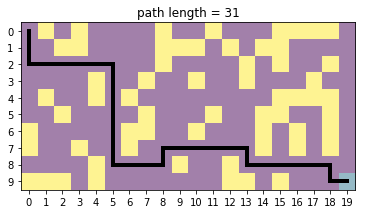

In [86]:
plot_map(grid, pp)

observe computing times. larger mazes makes DFS more iterations (but slower due to data structures which should be improved)

In [34]:
grid = generate_maze(size=(10,20))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

100 loops, best of 3: 8.25 ms per loop
100 loops, best of 3: 5.7 ms per loop
bfs solution len n_iterations 325, max_queue_len 31
29
dfs solution len n_iterations 184, max_queue_len 86
81


In [35]:
grid = generate_maze(size=(20,30))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

10 loops, best of 3: 22.5 ms per loop
10 loops, best of 3: 28.3 ms per loop
bfs solution len n_iterations 895, max_queue_len 53
57
dfs solution len n_iterations 1013, max_queue_len 198
125


In [36]:
grid = generate_maze(size=(50,50))
%timeit bfs_search(grid, verbose=False)
%timeit dfs_search(grid, verbose=False)

print "bfs solution len", len(bfs_search(grid))
print "dfs solution len", len(dfs_search(grid))

10 loops, best of 3: 117 ms per loop
10 loops, best of 3: 81.2 ms per loop
bfs solution len n_iterations 4600, max_queue_len 106
101
dfs solution len n_iterations 2620, max_queue_len 728
547


### "Although some of these algorithms can solve any solvable problem, none of them can do so efficiently"

# References

[1] [labyrinth-algorithms](http://bryukh.com/labyrinth-algorithms/).


<img src="../imgs/robot_comic.png" style="width:300px;">

---
# <center> Thanks! </center>